<a id='top'></a>

# Second Spectrum Data Visualisation
##### Notebook to visualise and analyse engineered [Second Spectrum](https://www.secondspectrum.com/index.html) Tracking data using [pandas](http://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/).

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 20/01/2022<br>
Notebook last updated: 01/02/2022

![Pitch Control Screenshot](../../img/pitch_control_screenshot.png)

![Watford F.C.](../../img/logos/second_spectrum_logo.jpeg)

![Second Spectrum](../../img/club_badges/premier_league/watford_fc_logo_small.png)

Click [here](#section4) to jump straight into the Data Analysis section and skip the [Notebook Brief](#section2) and [Data Sources](#section3) sections.

___


## <a id='introduction'>Introduction</a>
This notebook analyses and visualises [Second Spectrum](https://www.secondspectrum.com/index.html) Tracking data for two matches, that have been provided by [Watford F.C](https://www.watfordfc.com/), using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames and [matplotlib](https://matplotlib.org/) for data visualisation.

For more information about this notebook and the author, I am available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/); and
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster).

A static version of this notebook can be found [here](https://nbviewer.org/github/eddwebster/statsbomb/blob/main/notebooks/StatsBomb%20Data%20Engineering.ipynb). This notebook has an accompanying [`watford`](https://github.com/eddwebster/watford) GitHub repository and for my full repository of football analysis, see my [`football_analysis`](https://github.com/eddwebster/football_analytics) GitHub repository.

___

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Notebook Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Data Dicitonary](#section3.2)<br>
      3.    [Import the Data](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
4.    [Exploratory Data Analysis (EDA)](#section4)<br>
5.    [Data Analysis](#section5)<br>
      1.    [Crystal Palace (1) vs. (1) Brighton & Hove Albion (27/09/2021)](#section5.1)<br>
      2.    [Crystal Palace (2) vs. (2) Leicester City (03/10/2021)](#section5.2)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [References](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation; and 
*    [`matplotlib`](https://matplotlib.org/) for data visualisation.

All packages used for this notebook can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [38]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
import math
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import pandas_profiling as pp
import os
import re
import chardet
import random
from io import BytesIO
from pathlib import Path

# Kloppy
from kloppy import secondspectrum

# Reading Directories
import glob
import os

# Working with JSON
import json
from pandas import json_normalize

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import patches
import seaborn as sns
import missingno as msno
import moviepy.editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage

# Requests and downloads
import tqdm
import requests

# Machine Learning
import scipy.signal as signal
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay

# Display in Jupyter
from IPython.display import Image, Video, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Print message
print('Setup Complete')

Setup Complete


In [39]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))

Python: 3.7.6
NumPy: 1.19.1
pandas: 1.1.3
matplotlib: 3.3.1


### Defined Filepaths

In [40]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..')
data_dir = os.path.join(base_dir, 'data')
data_dir_second_spectrum = os.path.join(base_dir, 'data', 'second_spectrum')
data_dir_opta = os.path.join(base_dir, 'data', 'opta')
scripts_dir = os.path.join(base_dir, 'scripts')
scripts_dir_second_spectrum = os.path.join(base_dir, 'scripts', 'second_spectrum')
scripts_dir_metrica_sports = os.path.join(base_dir, 'scripts', 'metrica_sports')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
fig_dir_second_spectrum = os.path.join(base_dir, 'img', 'fig', 'second_spectrum')
video_dir = os.path.join(base_dir, 'video')
video_dir_second_spectrum = os.path.join(base_dir, 'video', 'fig', 'second_spectrum')

### Defined Variables

In [41]:
# Define variables

## Define pitch dimensions
pitch_length = 106.0
pitch_width = 68

## Team colours
colour_crystal_palace = 'r'
colour_leicester_city = 'b'
colour_brighton_and_hove_albion = 'c'

#colour_crystal_palace = '#C4122E'
#colour_leicester_city = '#003090'
#colour_brighton_and_hove_albion = '#0057B8'

### Custom Libraries for Tracking Data
Custom libraries for working with the [Second Spectrum](https://www.secondspectrum.com/index.html) data, that were initially written by [Laurie Shaw](https://twitter.com/EightyFivePoint), to work with the [Metrica Sports](https://metrica-sports.com/) data. See the following for his original code [[link](https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking)].

The modifications to this data include the ability to create Pitch Control models without Tracking data.

In [42]:
# Custom libraries for working with Tracking data

## Define path of scripts
sys.path.insert(0, os.path.abspath(scripts_dir_second_spectrum))

## Second Spectrum scripts - custom scripts derived from Laurie Shaw's Metrica scripts
import Second_Spectrum_IO as sio
import Second_Spectrum_Viz as sviz
import Second_Spectrum_Velocities as svel
import Second_Spectrum_PitchControl as spc
import Second_Spectrum_EPV as sepv

In [43]:
"""
## Laurie Shaw's custom libraries for working with Metrica Sports data
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel
import Metrica_PitchControl as mpc
import Metrica_EPV as mepv
"""

"\n## Laurie Shaw's custom libraries for working with Metrica Sports data\nimport Metrica_IO as mio\nimport Metrica_Viz as mviz\nimport Metrica_Velocities as mvel\nimport Metrica_PitchControl as mpc\nimport Metrica_EPV as mepv\n"

### Custom Functions
Functions built on top of the Second Spectrum scripts, designed for use in this notebook.

In [44]:
# Define function to estimate the frame number for a timestamp in the data
def estimate_frame_no(minutes, seconds, frame_rate=25):
    
    '''
    Function to estimate the frame number for a timestamp in the data.
    '''
    
    frame_no = (minutes * 60 * frame_rate) + (seconds * frame_rate)
    
    return frame_no

In [45]:
# Define function to 
def create_tracking_data_video(df_tracking_home,
                               df_tracking_away,
                               frame_start,
                               video_length_frames,
                               filename
                              ):
    
    """
    Function to create Tracking data videos.
    """
    
    ## Create MP4 video of tracking data
    if not os.path.exists(video_dir_second_spectrum + f'/{filename}_{frame_start}_{frame_start+video_length_frames}.mp4'):
        sviz.save_match_clip(hometeam=df_tracking_home.iloc[frame_start:frame_start+video_length_frames],
                             awayteam=df_tracking_away.iloc[frame_start:frame_start+video_length_frames],
                             fpath=video_dir_second_spectrum,
                             fname=f'/{filename}_{frame_start}_{frame_start+video_length_frames}',
                             frames_per_second=25,
                             team_colors=('r','b'),
                             field_dimen = (106.0,68.0),
                             include_player_velocities=False,
                             PlayerMarkerSize=10,
                             PlayerAlpha=0.7
                            )
    else:
        pass

In [46]:
# Define function to create Pitch Control visualisation for individual frames
def create_pitch_control_frame(frame_idx,
                               tracking_home,
                               tracking_away,
                               colour_home,
                               colour_away,
                               filename
                              ):
    
    """
    Function to create Pitch Control visualisation for individual frames
    """
    
    ## Define cmap
    cmap=LinearSegmentedColormap.from_list('mycmap', [colour_away, 'white', colour_home])
    
    ## Create MP4 video of tracking data
    if not os.path.exists(fig_dir_second_spectrum + f'/pitch_control_frame_{filename}_{frame_idx}.mp4'):
        PPCF, xgrid, ygrid = spc.generate_pitch_control_for_event(frame_idx, tracking_home, tracking_home, tracking_away, params, GK_numbers, n_grid_cells_x=50)
        sviz.plot_pitchcontrol_for_event(frame_idx,
                                         tracking_home,
                                         tracking_home=tracking_home,
                                         tracking_away=tracking_away,
                                         PPCF=PPCF,
                                         cmap=cmap,
                                         include_player_velocities=False,
                                         annotate=True
                                        )
        
        plt.savefig(fig_dir_second_spectrum + f'/pitch_control_frame_{filename}_{frame_idx}.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
            
    else:
        pass

In [ ]:
"""
# NOT WORKING PERFECTLY AT THE MOMENT, CODE USED BUT NOT IN A FUNCTION CURRENTLY

# Visualise player positions using generate_pitch_control_for_event function from spc library
def make_frame(t):
    t2 = int(math.ceil(t*f+0.0001)-1)
    #PPCF,xgrid,ygrid = spc.generate_pitch_control_for_event(t2+starting_frame, tracking_home, tracking_home, tracking_away, params, GK_numbers, field_dimen = (pitch_length, pitch_width), n_grid_cells_x=50)
    #fig, ax = sviz.plot_pitchcontrol_for_event(t2+starting_frame, tracking_home, tracking_home, tracking_away, PPCF, cmap, annotate=False)
    PPCF, xgrid, ygrid = spc.generate_pitch_control_for_event(t2+starting_frame, tracking_home, tracking_home, tracking_away, params, GK_numbers, field_dimen = (pitch_length, pitch_width), n_grid_cells_x=50)
    fig, ax = sviz.plot_pitchcontrol_for_event(t2+starting_frame, tracking_home, tracking_home, tracking_away, PPCF, cmap, include_player_velocities=False, annotate=True)
    image = mplfig_to_npimage(fig)
    return image    # returns a 8-bit RGB array


# Define function to create Pitch Control visualisation for individual frames
def create_pitch_control_video(starting_frame,
                               end_frame,
                               f,
                               tracking_home,
                               tracking_away,
                               colour_home,
                               colour_away,
                               pitch_length,
                               pitch_width,
                               filename
                              ):
    
    """
    #Function to create Pitch Control visualisation for a video of frames
    """
    
    ## Create colour map
    cmap = LinearSegmentedColormap.from_list('mycmap', [colour_away, 'white', colour_home]),
    
    ## Create MP4 video of tracking data
    if not os.path.exists(video_dir_second_spectrum + f'/pitch_control_clip_{filename}_{starting_frame}_{end_frame}.mp4'):
        clip = mpy.VideoClip(make_frame, duration=((end_frame-starting_frame)/f)).set_fps(f)
        clip.write_videofile(video_dir_second_spectrum + f'/pitch_control_clip_{filename}_{starting_frame}_{end_frame}.mp4')
            
    else:
        pass
"""

In [48]:
# Define a function to generate a bespoke physical summary of all the players for the the team of interest
def create_physical_report(df_tracking,
                           team,
                           match,
                           filename
                          ):
    
    ## Data Engineering
    
    ### Drop player that did not play
    temp = df_tracking.dropna(axis=1, how='all')

    ### Create DataFrame to identify the jersey number of the Home players
    df_players = np.unique([ c.split('_')[1] for c in df_tracking.columns if c[:4] == 'Home'])

    ### Create DataFrame where each row is a player
    df_summary = pd.DataFrame(index=df_players)
    
    
    
    ## Calculate minutes played for each player

    ### Create emplty list for minutes
    lst_minutes = []

    ### Cycle through each player's jersey number in the home team and look for the first and last time for each player
    for player in df_players:
        
        #### Search for first and last frames that we have a position observation for each player (when a player is not on the pitch positions are NaN)
        column = f'{team}_' + player + '_x' # use player x-position coordinate
        try:
            player_minutes = (df_tracking[column].last_valid_index() - df_tracking[column].first_valid_index() + 1 ) / 25 / 60     # convert to minutes
        except:
            player_minutes = 0
        lst_minutes.append(player_minutes)
        
    ### Create column for the minute played
    df_summary['Minutes Played'] = lst_minutes

    ### Sort values by minutes played descending
    df_summary = df_summary.sort_values(['Minutes Played'], ascending=False)


    
    ## Calculate total distance covered for each player

    ### Create empty list for distance
    lst_distance = []

    ### Cycle through each player's jersey number in the home team and multiple their speed at any given instance by 40ms to get total distance and divide by 1,000 to get this in km
    for player in df_summary.index:
        column = f'{team}_' + player + '_speed'
        df_player_distance = df_tracking[column].sum()/25./1000    # speed time time. Convert to km
        lst_distance.append(df_player_distance)

    ### Create column for the distance in km
    df_summary['Distance [km]'] = lst_distance


    """    
    ## Make a simple bar chart of distance covered for each player
    plt.subplots()
    ax = df_summary['Distance [km]'].plot.bar(rot=0)
    ax.set_xlabel('Player')
    ax.set_ylabel('Distance covered [km]')
    """
    
    
    ## Calculate total distance covered for each player for different types of movement

    ### Create empty list for distance
    lst_distance = []

    ### Cycle through each player's jersey number in the home team and multiple their speed at any given instance by 40ms to get total distance and divide by 1,000 to get this in km
    for player in df_summary.index:
        column = f'{team}_' + player + '_speed'
        df_player_distance = df_tracking[column].sum()/25./1000    # speed time time. Convert to km
        lst_distance.append(df_player_distance)
    
    ### Create column for the distance in km
    df_summary['Distance [km]'] = lst_distance
    
    
    
    ## Calculate total distance covered for each player for different types of movement

    ### Create empty lists for distances of different movements
    lst_walking = []
    lst_jogging = []
    lst_running = []
    lst_sprinting = []

    ### Cycle through each player's jersey number in the home team and 
    for player in df_summary.index:
        column = f'{team}_' + player + '_speed'
        ### Walking (less than 2m/s)
        player_distance = df_tracking.loc[df_tracking[column] <2, column].sum()/25./1000
        lst_walking.append(player_distance)
        ### Jogging (between 2 and 4 m/s)
        player_distance = df_tracking.loc[(df_tracking[column] >= 2) & (df_tracking[column] < 4), column].sum()/25./1000
        lst_jogging.append(player_distance)
        ### Running (between 4 and 7 m/s)
        player_distance = df_tracking.loc[(df_tracking[column] >= 4) & (df_tracking[column] < 7), column].sum()/25./1000
        lst_running.append(player_distance)
        ### Sprinting (greater than 7 m/s)
        player_distance = df_tracking.loc[df_tracking[column] >= 7, column].sum()/25./1000
        lst_sprinting.append(player_distance)

    ### Assign each movement list to a column in the Home Summary DataFrame
    df_summary['Walking [km]'] = lst_walking
    df_summary['Jogging [km]'] = lst_jogging
    df_summary['Running [km]'] = lst_running
    df_summary['Sprinting [km]'] = lst_sprinting
    
    
    """    
    ## Make a clustered bar chart of distance covered for each player at each speed
    ax = df_summary[['Walking [km]', 'Jogging [km]', 'Running [km]', 'Sprinting [km]']].plot.bar(colormap='coolwarm')
    ax.set_xlabel('Player')
    ax.set_ylabel('Distance covered [m]')
    """    
    
    ## Reset index
    df_summary = df_summary.reset_index(drop=False)
   
    ## Rename columns
    df_summary = df_summary.rename(columns={'index': 'JerseyNo'})   
    
    
    ## Add columns
    df_summary['Team'] = team
    df_summary['Match'] = match
    
    """    
    ## Save figure
    if not os.path.exists(fig_dir_second_spectrum + f'/physical_summary_{filename}.png'):
        plt.savefig(fig_dir_second_spectrum + f'/physical_summary_{filename}.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
    else:
        pass
    """    
    
    ## Export DataFrame
    if not os.path.exists(os.path.join(data_dir_second_spectrum, 'engineered', 'reports', f'physical_report_data_{filename}_{team}.csv')):
        df_summary.to_csv(os.path.join(data_dir_second_spectrum, 'engineered', 'reports', f'physical_report_data_{filename}_{team}.csv'), index=None, header=True)
    else:
        pass

    
    ## Return DataFrame
    return df_summary

In [100]:
# Define a function to engineer Opta event data for just shots
def events_shots_only(df_events):
    
    ## Filter only for shots
    df_shots = df_events[df_events['isShot'] == 1]

    
    ## Select columns of interest
    
    ### Define list of columns 
    lst_cols_shots = ['event_id', 'period_id', 'min', 'sec', 'x', 'y', 'event_name', 'Home Team', 'Away Team', 'FirstName', 'LastName', 'FullName', 'Position', 'JerseyNo', 'outcome', 'isShot', 'isGoal', 'xG', 'xT']
    
    ### Filter shots DataFrame for only columns of interest
    df_shots = df_shots[lst_cols_shots]

    
    ## Return DataFrame
    return df_shots

### Notebook Settings

In [49]:
# Display all columns of displayed pandas DataFrames
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

---

<a id='section2'></a>

## <a id='#section2'>2. Notebook Brief</a>
This notebook analyses and visualises [Second Spectrum](https://www.secondspectrum.com/index.html) using [pandas](http://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/), for two Premier League matches featuring Crystal Palace during the 21/22 season.

The two datasets of Tracking data are visualised and analysed in congunction with the corresponding [Opta Event data](https://www.statsperform.com/opta/) by [Stats Perform](https://www.statsperform.com/), as part of an opposition analysis piece of Crystal Palace. These matches are: 
*   [27/09/2021: Crystal Palace (1) vs. (1) Brighton & Hove Albion](https://www.bbc.co.uk/sport/football/58620544) (g2210324)
*   [03/10/2021: Crystal Palace (2) vs. (2) Leicester City](https://www.bbc.co.uk/sport/football/58667896) (g2210334)

Output of this notebook include [matplotlib](https://matplotlib.org/) data visualisations and DataFrames exported as CSV files, that can be further analysed and explored using dashboarding tools such as Tableau.


**Notebook Conventions**:<br>
*    Variables that refer a `DataFrame` object are prefixed with `df_`.
*    Variables that refer to a collection of `DataFrame` objects (e.g., a list, a set or a dict) are prefixed with `dfs_`.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

<a id='section3.1'></a>

### <a id='#section3.1'>3.1. Introduction</a>
[Second Spectrum](https://www.secondspectrum.com/index.html) are a  football analytics, data provider ... 

![Second Spectrum](../../img/logos/second_spectrum_logo.jpeg)

The tracking data represents the location of every player on the pitch with a temporal frequency of 25 Hz and the corresponding match time for each tracking frame is specified.

UPDATE THIS

<a id='section3.2'></a>

### <a id='#section3.2'>3.2. Data Dictionary</a>
The [Second Spectrum](https://www.secondspectrum.com/index.html) Tracking dataset has fourteen features (columns) with the following definitions and data types:

| Feature         | Data type     | Definition     |
|-----------------|---------------|----------------|
| `Frame`         | object        |                |
| `Period`        | object        |                |
| `Time [s]`      | object        |                |
| `Home_11_x`     | object        |                |	
| `Home_11_y`     | object        |                |
| `Away_8_x`      | object        |	               |
| `Away_8_y`      | object        |                |

UPDATE THIS

<a id='section3.2'></a>

### <a id='#section3.2'>3.2. Import Data</a>
The following cells read in the previously engineered `CSV` files as [pandas](https://pandas.pydata.org/) DataFrames. The Tracking data for Home and Away teams have been saved as separate `CSV` files, to be compatible with the Second Spectrum custom scripts.

A static version of the Data Engineering notebook that munges the original data into a form ready for analysis can be found [here](https://nbviewer.org/github/eddwebster/watford/blob/main/notebooks/2_data_engineering/Second%20Spectrum%20Data%20Engineering.ipynb) in the [Data Engineering]() subfolder of the accompanying [`watford`](https://github.com/eddwebster/watford) GitHub repository 

In [50]:
# Show files in directory
print(glob.glob(os.path.join(data_dir_second_spectrum, 'engineered', 'data/*.csv')))

['../../data/second_spectrum/engineered/data/g2210334_SecondSpectrum_Trackingdata_Home.csv', '../../data/second_spectrum/engineered/data/g2210324_SecondSpectrum_Trackingdata_Home.csv', '../../data/second_spectrum/engineered/data/g2210324_SecondSpectrum_Trackingdata_Away.csv', '../../data/second_spectrum/engineered/data/g2210334_SecondSpectrum_Trackingdata_Away.csv']


In [51]:
# Read in engineered Tracking data CSV files as  pandas DataFrames

## 27/09/2021: Crystal Palace (1) vs. (1) Brighton & Hove Albion (g2210324)
df_tracking_home_cry_bri = pd.read_csv(os.path.join(data_dir_second_spectrum, 'engineered', 'data', 'g2210324_SecondSpectrum_Trackingdata_Home.csv'))
df_tracking_away_cry_bri = pd.read_csv(os.path.join(data_dir_second_spectrum, 'engineered', 'data', 'g2210324_SecondSpectrum_Trackingdata_Away.csv'))

## 03/10/2021: Crystal Palace (2) vs. (2) Leicester City (g2210334)
df_tracking_home_cry_lei = pd.read_csv(os.path.join(data_dir_second_spectrum, 'engineered', 'data', 'g2210334_SecondSpectrum_Trackingdata_Home.csv'))
df_tracking_away_cry_lei = pd.read_csv(os.path.join(data_dir_second_spectrum, 'engineered', 'data', 'g2210334_SecondSpectrum_Trackingdata_Away.csv'))

<a id='section3.3'></a>

### <a id='#section3.3'>3.3. Initial Data Handling</a>
First check the quality of the dataset by looking first and last rows in pandas using the [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [`tail()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [52]:
# Display the first five rows of the DataFrame, df_tracking_home_cry_lei
df_tracking_home_cry_lei.head()

,Frame,Period,Time [s],Ball State,Ball Owning Team ID,ball_x,ball_y,Home_4_x,Home_4_y,Home_4_d,Home_4_s,Home_2_x,Home_2_y,Home_2_d,Home_2_s,Home_9_x,Home_9_y,Home_9_d,Home_9_s,Home_13_x,Home_13_y,Home_13_d,Home_13_s,Home_18_x,Home_18_y,Home_18_d,Home_18_s,Home_22_x,Home_22_y,Home_22_d,Home_22_s,Home_3_x,Home_3_y,Home_3_d,Home_3_s,Home_11_x,Home_11_y,Home_11_d,Home_11_s,Home_6_x,Home_6_y,Home_6_d,Home_6_s,Home_23_x,Home_23_y,Home_23_d,Home_23_s,Home_16_x,Home_16_y,Home_16_d,Home_16_s,Home_7_x,Home_7_y,Home_7_d,Home_7_s,Home_15_x,Home_15_y,Home_15_d,Home_15_s,Home_20_x,Home_20_y,Home_20_d,Home_20_s,Home_4_vx,Home_4_vy,Home_4_speed,Home_2_vx,Home_2_vy,Home_2_speed,Home_9_vx,Home_9_vy,Home_9_speed,Home_13_vx,Home_13_vy,Home_13_speed,Home_18_vx,Home_18_vy,Home_18_speed,Home_22_vx,Home_22_vy,Home_22_speed,Home_3_vx,Home_3_vy,Home_3_speed,Home_11_vx,Home_11_vy,Home_11_speed,Home_6_vx,Home_6_vy,Home_6_speed,Home_23_vx,Home_23_vy,Home_23_speed,Home_16_vx,Home_16_vy,Home_16_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_15_vx,Home_15_vy,Home_15_speed,Home_20_vx,Home_20_vy,Home_20_speed
0,0,1,0.00,dead,31,0.04,0.09,0.60,-9.08,NaN,NaN,11.43,10.22,NaN,NaN,0.21,9.47,NaN,NaN,42.10,-0.19,NaN,NaN,-0.36,0.35,NaN,NaN,-0.57,-20.55,NaN,NaN,7.63,-25.09,NaN,NaN,1.22,-30.53,NaN,NaN,14.71,-12.51,NaN,NaN,0.51,2.82,NaN,NaN,19.24,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,0.04,alive,31,0.83,0.09,0.56,-9.07,NaN,NaN,11.41,10.22,NaN,NaN,0.22,9.47,NaN,NaN,42.11,-0.19,NaN,NaN,-0.35,0.35,NaN,NaN,-0.64,-20.47,NaN,NaN,7.62,-25.09,NaN,NaN,1.24,-30.53,NaN,NaN,14.70,-12.52,NaN,NaN,0.50,2.81,NaN,NaN,19.23,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,0.25,1.030776,-0.50,0.00,0.500000,0.25,0.00,0.250000,0.25,0.0,0.25,0.25,0.00,0.250000,-1.75,2.00,2.657536,-0.25,0.00,0.250000,0.50,0.0,0.50,-0.25,-0.25,0.353553,-0.25,-0.25,0.353553,-0.25,0.0,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,0.08,alive,31,1.34,0.09,0.53,-9.07,NaN,NaN,11.41,10.21,NaN,NaN,0.22,9.46,NaN,NaN,42.11,-0.19,NaN,NaN,-0.34,0.34,NaN,NaN,-0.71,-20.40,NaN,NaN,7.62,-25.08,NaN,NaN,1.25,-30.53,NaN,NaN,14.70,-12.53,NaN,NaN,0.49,2.80,NaN,NaN,19.23,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.75,0.00,0.750000,0.00,-0.25,0.250000,0.00,-0.25,0.250000,0.00,0.0,0.00,0.25,-0.25,0.353553,-1.75,1.75,2.474874,0.00,0.25,0.250000,0.25,0.0,0.25,0.00,-0.25,0.250000,-0.25,-0.25,0.353553,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,0.12,alive,31,2.03,0.10,0.50,-9.06,NaN,NaN,11.39,10.21,NaN,NaN,0.23,9.45,NaN,NaN,42.11,-0.19,NaN,NaN,-0.35,0.34,NaN,NaN,-0.79,-20.31,NaN,NaN,7.60,-25.08,NaN,NaN,1.26,-30.53,NaN,NaN,14.69,-12.54,NaN,NaN,0.47,2.78,NaN,NaN,19.23,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.75,0.25,0.790569,-0.50,0.00,0.500000,0.25,-0.25,0.353553,0.00,0.0,0.00,-0.25,0.00,0.250000,-2.00,2.25,3.010399,-0.50,0.00,0.500000,0.25,0.0,0.25,-0.25,-0.25,0.353553,-0.50,-0.50,0.707107,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,0.16,alive,31,2.85,0.11,0.46,-9.06,NaN,NaN,11.40,10.19,NaN,NaN,0.25,9.43,NaN,NaN,42.11,-0.19,NaN,NaN,-0.36,0.33,NaN,NaN,-0.88,-20.23,NaN,NaN,7.59,-25.07,NaN,NaN,1.27,-30.53,NaN,NaN,14.68,-12.56,NaN,NaN,0.46,2.77,NaN,NaN,19.23,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,0.00,1.000000,0.25,-0.50,0.559017,0.50,-0.50,0.707107,0.00,0.0,0.00,-0.25,-0.25,0.353553,-2.25,2.00,3.010399,-0.25,0.25,0.353553,0.25,0.0,0.25,-0.25,-0.50,0.559017,-0.25,-0.25,0.353553,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Display the last five rows of the DataFrame, 
df_tracking_home_cry_lei.tail()

,Frame,Period,Time [s],Ball State,Ball Owning Team ID,ball_x,ball_y,Home_4_x,Home_4_y,Home_4_d,Home_4_s,Home_2_x,Home_2_y,Home_2_d,Home_2_s,Home_9_x,Home_9_y,Home_9_d,Home_9_s,Home_13_x,Home_13_y,Home_13_d,Home_13_s,Home_18_x,Home_18_y,Home_18_d,Home_18_s,Home_22_x,Home_22_y,Home_22_d,Home_22_s,Home_3_x,Home_3_y,Home_3_d,Home_3_s,Home_11_x,Home_11_y,Home_11_d,Home_11_s,Home_6_x,Home_6_y,Home_6_d,Home_6_s,Home_23_x,Home_23_y,Home_23_d,Home_23_s,Home_16_x,Home_16_y,Home_16_d,Home_16_s,Home_7_x,Home_7_y,Home_7_d,Home_7_s,Home_15_x,Home_15_y,Home_15_d,Home_15_s,Home_20_x,Home_20_y,Home_20_d,Home_20_s,Home_4_vx,Home_4_vy,Home_4_speed,Home_2_vx,Home_2_vy,Home_2_speed,Home_9_vx,Home_9_vy,Home_9_speed,Home_13_vx,Home_13_vy,Home_13_speed,Home_18_vx,Home_18_vy,Home_18_speed,Home_22_vx,Home_22_vy,Home_22_speed,Home_3_vx,Home_3_vy,Home_3_speed,Home_11_vx,Home_11_vy,Home_11_speed,Home_6_vx,Home_6_vy,Home_6_speed,Home_23_vx,Home_23_vy,Home_23_speed,Home_16_vx,Home_16_vy,Home_16_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_15_vx,Home_15_vy,Home_15_speed,Home_20_vx,Home_20_vy,Home_20_speed
145616,145616,2,3003.92,dead,31,-0.0,-0.0,3.75,18.83,NaN,NaN,3.06,30.92,NaN,NaN,NaN,NaN,NaN,NaN,37.09,5.20,NaN,NaN,3.05,3.99,NaN,NaN,NaN,NaN,NaN,NaN,1.01,-8.49,NaN,NaN,-6.16,-13.24,NaN,NaN,13.54,3.99,NaN,NaN,NaN,NaN,NaN,NaN,19.02,27.61,NaN,NaN,-3.14,31.79,NaN,NaN,-14.74,21.58,NaN,NaN,-20.38,2.36,NaN,NaN,0.50,-1.00,1.118034,0.50,-1.25,1.346291,NaN,NaN,NaN,-0.50,1.00,1.118034,-0.00,-0.50,0.500000,NaN,NaN,NaN,-0.75,-1.00,1.250000,-0.75,-0.75,1.060660,0.25,-0.50,0.559017,NaN,NaN,NaN,-0.25,-0.75,0.790569,-2.75,-1.0,2.926175,-0.00,-0.50,0.500000,0.50,-1.50,1.581139
145617,145617,2,3003.96,dead,31,-0.0,-0.0,3.76,18.77,NaN,NaN,3.07,30.87,NaN,NaN,NaN,NaN,NaN,NaN,37.07,5.24,NaN,NaN,3.05,3.97,NaN,NaN,NaN,NaN,NaN,NaN,0.98,-8.54,NaN,NaN,-6.20,-13.26,NaN,NaN,13.55,3.97,NaN,NaN,NaN,NaN,NaN,NaN,19.02,27.58,NaN,NaN,-3.25,31.75,NaN,NaN,-14.74,21.55,NaN,NaN,-20.36,2.30,NaN,NaN,0.25,-1.50,1.520691,0.25,-1.25,1.274755,NaN,NaN,NaN,-0.50,1.00,1.118034,-0.00,-0.50,0.500000,NaN,NaN,NaN,-0.75,-1.25,1.457738,-1.00,-0.50,1.118034,0.25,-0.50,0.559017,NaN,NaN,NaN,-0.00,-0.75,0.750000,-2.75,-1.0,2.926175,-0.00,-0.75,0.750000,0.50,-1.50,1.581139
145618,145618,2,3004.00,dead,31,-0.0,-0.0,3.78,18.73,NaN,NaN,3.09,30.82,NaN,NaN,NaN,NaN,NaN,NaN,37.04,5.27,NaN,NaN,3.04,3.95,NaN,NaN,NaN,NaN,NaN,NaN,0.95,-8.58,NaN,NaN,-6.23,-13.29,NaN,NaN,13.56,3.95,NaN,NaN,NaN,NaN,NaN,NaN,19.00,27.55,NaN,NaN,-3.35,31.71,NaN,NaN,-14.75,21.53,NaN,NaN,-20.34,2.24,NaN,NaN,0.50,-1.00,1.118034,0.50,-1.25,1.346291,NaN,NaN,NaN,-0.75,0.75,1.060660,-0.25,-0.50,0.559017,NaN,NaN,NaN,-0.75,-1.00,1.250000,-0.75,-0.75,1.060660,0.25,-0.50,0.559017,NaN,NaN,NaN,-0.50,-0.75,0.901388,-2.50,-1.0,2.692582,-0.25,-0.50,0.559017,0.50,-1.50,1.581139
145619,145619,2,3004.04,dead,31,-0.0,-0.0,3.80,18.67,NaN,NaN,3.10,30.77,NaN,NaN,NaN,NaN,NaN,NaN,37.01,5.31,NaN,NaN,3.04,3.92,NaN,NaN,NaN,NaN,NaN,NaN,0.92,-8.63,NaN,NaN,-6.26,-13.32,NaN,NaN,13.57,3.92,NaN,NaN,NaN,NaN,NaN,NaN,18.99,27.51,NaN,NaN,-3.45,31.67,NaN,NaN,-14.75,21.50,NaN,NaN,-20.31,2.18,NaN,NaN,0.50,-1.50,1.581139,0.25,-1.25,1.274755,NaN,NaN,NaN,-0.75,1.00,1.250000,-0.00,-0.75,0.750000,NaN,NaN,NaN,-0.75,-1.25,1.457738,-0.75,-0.75,1.060660,0.25,-0.75,0.790569,NaN,NaN,NaN,-0.25,-1.00,1.030776,-2.50,-1.0,2.692582,-0.00,-0.75,0.750000,0.75,-1.50,1.677051
145620,145620,2,3004.08,dead,31,-0.0,-0.0,3.81,18.62,NaN,NaN,3.12,30.72,NaN,NaN,NaN,NaN,NaN,NaN,36.98,5.34,NaN,NaN,3.04,3.90,NaN,NaN,NaN,NaN,NaN,NaN,0.90,-8.68,NaN,NaN,-6.29,-13.34,NaN,NaN,13.58,3.90,NaN,NaN,NaN,NaN,NaN,NaN,18.98,27.48,NaN,NaN,-3.54,31.63,NaN,NaN,-14.76,21.48,NaN,NaN,-20.29,2.13,NaN,NaN,0.25,-1.25,1.274755,0.50,-1.25,1.346291,NaN,NaN,NaN,-0.75,0.75,1.060660,-0.00,-0.50,0.500000,NaN,NaN,NaN,-0.50,-1.25,1.346291,-0.75,-0.50,0.901388,0.25,-0.50,0.559017,NaN,NaN,NaN,-0.25,-0.75,0.790569,-2.25,-1.0,2.462214,-0.25,-0.50,0.559017,0.50,-1.25,1.346291


In [54]:
# Print the shape of the DataFrame, df_tracking_home_cry_lei
print(df_tracking_home_cry_lei.shape)

(145621, 105)


In [55]:
# Print the column names of the DataFrame, df_tracking_home_cry_lei
print(df_tracking_home_cry_lei.columns)

Index(['Frame', 'Period', 'Time [s]', 'Ball State', 'Ball Owning Team ID',
       'ball_x', 'ball_y', 'Home_4_x', 'Home_4_y', 'Home_4_d',
       ...
       'Home_16_speed', 'Home_7_vx', 'Home_7_vy', 'Home_7_speed', 'Home_15_vx',
       'Home_15_vy', 'Home_15_speed', 'Home_20_vx', 'Home_20_vy',
       'Home_20_speed'],
      dtype='object', length=105)


In [56]:
# Data types of the features of the raw DataFrame, df_tracking_home_cry_lei
df_tracking_home_cry_lei.dtypes

Frame                    int64
Period                   int64
Time [s]               float64
Ball State              object
Ball Owning Team ID      int64
                        ...   
Home_15_vy             float64
Home_15_speed          float64
Home_20_vx             float64
Home_20_vy             float64
Home_20_speed          float64
Length: 105, dtype: object

Full details of these attributes and their data types is discussed further in the [Data Dictionary](section3.2.2).

In [57]:
# Displays all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_tracking_home_cry_lei.dtypes)

Frame                    int64
Period                   int64
Time [s]               float64
Ball State              object
Ball Owning Team ID      int64
ball_x                 float64
ball_y                 float64
Home_4_x               float64
Home_4_y               float64
Home_4_d               float64
Home_4_s               float64
Home_2_x               float64
Home_2_y               float64
Home_2_d               float64
Home_2_s               float64
Home_9_x               float64
Home_9_y               float64
Home_9_d               float64
Home_9_s               float64
Home_13_x              float64
Home_13_y              float64
Home_13_d              float64
Home_13_s              float64
Home_18_x              float64
Home_18_y              float64
Home_18_d              float64
Home_18_s              float64
Home_22_x              float64
Home_22_y              float64
Home_22_d              float64
Home_22_s              float64
Home_3_x               float64
Home_3_y

In [58]:
# Info for the raw DataFrame, df_tracking_home_cry_lei
df_tracking_home_cry_lei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145621 entries, 0 to 145620
Columns: 105 entries, Frame to Home_20_speed
dtypes: float64(101), int64(3), object(1)
memory usage: 116.7+ MB


<AxesSubplot:>

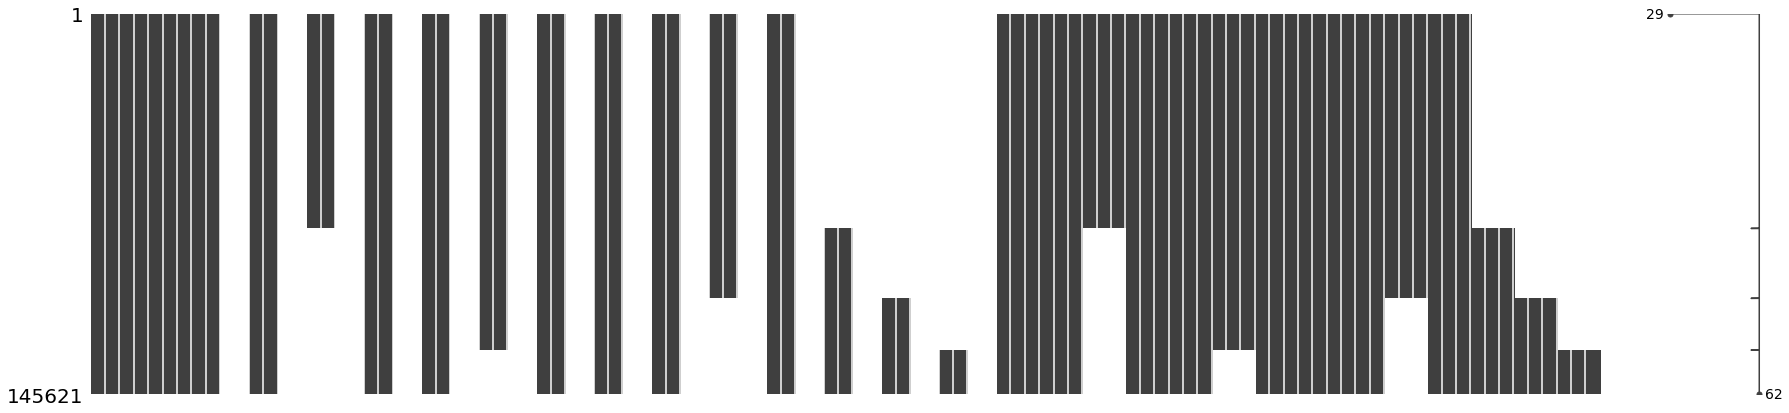

In [59]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tracking_home_cry_lei
msno.matrix(df_tracking_home_cry_lei, figsize = (30, 7))

In [60]:
# Counts of missing values
null_value_stats = df_tracking_home_cry_lei.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Home_4_d         145621
Home_4_s         145621
Home_2_d         145621
Home_2_s         145621
Home_9_x          63487
                  ...  
Home_15_vy       108895
Home_15_speed    108895
Home_20_vx       128695
Home_20_vy       128695
Home_20_speed    128695
Length: 82, dtype: int64

---

<a id='section4'></a>

## <a id='#section4'>4. Exploratory Data Analysis (EDA)</a>
The following EDA section explores the Tracking data for [Crystal Palace vs. Leicester City](https://www.bbc.co.uk/sport/football/58620544) (g2210334). The 

<a id='section4.1'></a>

### <a id='#section4.1'>4.1. Visualisation of Player Positions</a>

##### Kick Off
Frame = 20.

In [61]:
"""
# Visualise player positions using plot_events function from sviz library
fig, ax = sviz.plot_frame(frame_idx=20,
                          hometeam=df_tracking_home_cry_lei,
                          awayteam=df_tracking_away_cry_lei,
                          team_colors=(colour_crystal_palace, colour_leicester_city),
                          field_dimen=(pitch_length, pitch_width),
                          PlayerMarkerSize=12,
                          PlayerAlpha=0.7, 
                          include_player_velocities=False,
                          annotate=True,
                          filepath=fig_dir_second_spectrum + f'/player_positions_'
                         )
"""

"\n# Visualise player positions using plot_events function from sviz library\nfig, ax = sviz.plot_frame(frame_idx=20,\n                          hometeam=df_tracking_home_cry_lei,\n                          awayteam=df_tracking_away_cry_lei,\n                          team_colors=(colour_crystal_palace, colour_leicester_city),\n                          field_dimen=(pitch_length, pitch_width),\n                          PlayerMarkerSize=12,\n                          PlayerAlpha=0.7, \n                          include_player_velocities=False,\n                          annotate=True,\n                          filepath=fig_dir_second_spectrum + f'/player_positions_'\n                         )\n"

##### First Goal (Iheanacho 31' minutes)
*    Timestamp = 31min
*    Frame = 46,255

In [62]:
# Estimate frame number from timestamp
estimate_frame_no(31, 0)

46500

In [63]:
"""
# Visualise player positions using plot_events function from sviz library
fig, ax = sviz.plot_frame(frame_idx=46_255,
                          hometeam=df_tracking_home_cry_lei,
                          awayteam=df_tracking_away_cry_lei,
                          team_colors=(colour_crystal_palace, colour_leicester_city),
                          field_dimen=(pitch_length, pitch_width),
                          PlayerMarkerSize=12,
                          PlayerAlpha=0.7, 
                          include_player_velocities=False,    # not working currently
                          annotate=True,
                          filepath=fig_dir_second_spectrum + f'/player_positions_'
                         )
"""

"\n# Visualise player positions using plot_events function from sviz library\nfig, ax = sviz.plot_frame(frame_idx=46_255,\n                          hometeam=df_tracking_home_cry_lei,\n                          awayteam=df_tracking_away_cry_lei,\n                          team_colors=(colour_crystal_palace, colour_leicester_city),\n                          field_dimen=(pitch_length, pitch_width),\n                          PlayerMarkerSize=12,\n                          PlayerAlpha=0.7, \n                          include_player_velocities=False,    # not working currently\n                          annotate=True,\n                          filepath=fig_dir_second_spectrum + f'/player_positions_'\n                         )\n"

Iheanacho was 1-on-1 with the goalkeeper to score the first of the match.

<a id='section4.2'></a>

### <a id='#section4.2'>4.2. Visualisation of the First 60 Seconds of the Match</a>

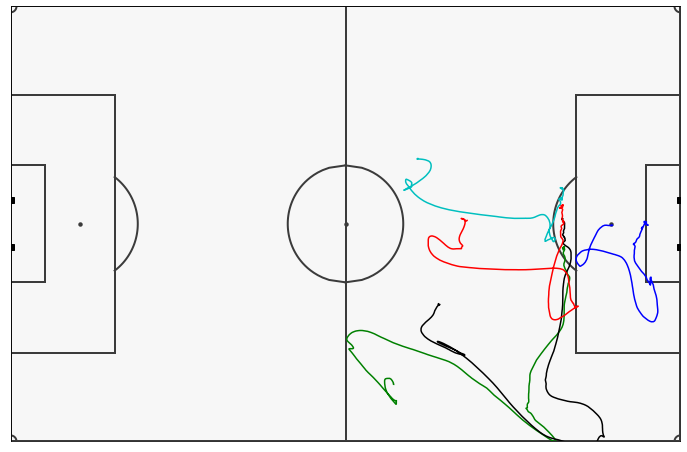

In [64]:
# Plotting tracking data - the first 60 seconds (i.e. 60 x 90 = 1500 frames)

## Define end frame for which to stop tracking player's movement
start_frame_idx = 0
end_frame_idx = 1_500

## Define player numbers shirt numbers
gk = '13'
lb = '3'
lcb = '6'
rcb = '16'
rb = '2'

## Define variables using in 'plot_pitch' function
tracking_home = df_tracking_home_cry_lei
tracking_away = df_tracking_away_cry_lei

## Visualise player positions using plot_events function from sviz library
fig, ax = sviz.plot_pitch()
ax.plot(tracking_home[f'Home_{gk}_x'].iloc[start_frame_idx:end_frame_idx], tracking_home[f'Home_{gk}_y'].iloc[start_frame_idx:end_frame_idx], 'b', MarkerSize=1)
ax.plot(tracking_home[f'Home_{lb}_x'].iloc[start_frame_idx:end_frame_idx], tracking_home[f'Home_{lb}_y'].iloc[start_frame_idx:end_frame_idx], 'g', MarkerSize=1)
ax.plot(tracking_home[f'Home_{lcb}_x'].iloc[start_frame_idx:end_frame_idx], tracking_home[f'Home_{lcb}_y'].iloc[start_frame_idx:end_frame_idx], 'k', MarkerSize=1)
ax.plot(tracking_home[f'Home_{rcb}_x'].iloc[start_frame_idx:end_frame_idx], tracking_home[f'Home_{rcb}_y'].iloc[start_frame_idx:end_frame_idx], 'r', MarkerSize=1)
ax.plot(tracking_home[f'Home_{rb}_x'].iloc[start_frame_idx:end_frame_idx], tracking_home[f'Home_{rb}_y'].iloc[start_frame_idx:end_frame_idx], 'c', MarkerSize=1)

## Save figure
if not os.path.exists(fig_dir_second_spectrum + f'/player_positions_backfive_first_60_seconds.png'):
    plt.savefig(fig_dir_second_spectrum + f'/player_positions_backfive_first_60_seconds.png', dpi=300, format='png', transparent=False, bbox_inches='tight')
else:
    pass

<a id='section4.3'></a>

### <a id='#section4.3'>4.3. Visualisations of the Goals</a>

The first goal of the match is was ccored by Iheanacho (31')
*    Timestamp = 31min
*    Frame = 46,255

In [65]:
# Estimate frame number from timestamp
estimate_frame_no(31, 0)

46500

In [66]:
create_tracking_data_video(df_tracking_home=df_tracking_home_cry_lei,
                           df_tracking_away=df_tracking_away_cry_lei,
                           frame_start=46_055,
                           video_length_frames=400,
                           filename='tracking_clip_first_goal_cry_lei'
                          )

In [67]:
# Embed shot in the notebook
#Video('../../video/fig/second_spectrum/tracking_video_first_goal_cry_lei_46055_46555.mp4', width=770, height=530)

Crystal Palace lose the ball and Iheanacho scores a 1-on-1.

<a id='section4.4'></a>

### <a id='#section4.4'>4.4. Pitch Control</a>
Using the Tracking data, we can use this to build your Pitch Control models in Python and demonstrate how it can be used to evaluate a player's passing options using tracking and event data. But what is a Pitch Control model?

Definition:
**Pitch control at a given location is the probability that a player (or team) will gain control of the ball if it moves directly to that location.**

Pitch control measures the probability that a team will retain possession of the ball if they pass it to another location on the field. It can be used to evaluate passing options for a player, and quantify the probability of success.

The method described here is based on work by [William Spearman](https://twitter.com/the_spearman), as described in his Friend of Tracking video tutorial: [[link](https://www.youtube.com/watch?v=X9PrwPyolyU)] and see below.

Also see Spearman's paper "Beyond Expected Goals" published at the 2018 MIT Sloan Sports Analytics Conference [[link](http://www.sloansportsconference.com/wp-content/uploads/2018/02/2002.pdf)].

In the video below, Spearman explains the following for Pitch Control:
*    The principles behind pitch control models.
*    How they can be used to investigate player positioning.
*    How to extend them to account for ball motion.
*    How to combine pitch control models with measures of danger.
*    Defining 'off-ball scoring opportunity'
*    Extensions to pitch control.

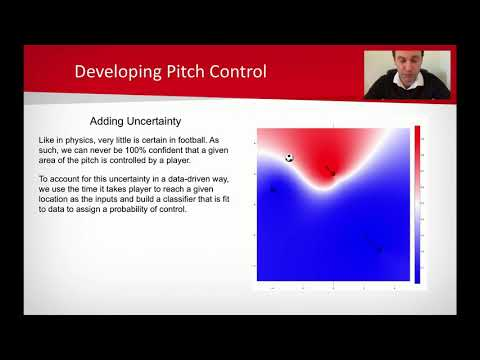

In [68]:
# Liverpool FC data scientist William Spearman's masterclass in pitch control
YouTubeVideo('X9PrwPyolyU', width=800, height=470)

In [69]:
# Determine the Pitch Control model parameters
params = spc.default_model_params()

In [70]:
# Print model parameters
params

{'max_player_accel': 7.0,
 'max_player_speed': 5.0,
 'reaction_time': 0.7,
 'tti_sigma': 0.45,
 'kappa_def': 1.0,
 'lambda_att': 4.3,
 'lambda_def': 4.3,
 'lambda_gk': 12.899999999999999,
 'average_ball_speed': 15.0,
 'int_dt': 0.04,
 'max_int_time': 10,
 'model_converge_tol': 0.01,
 'time_to_control_att': 3.3202550055547313,
 'time_to_control_def': 3.3202550055547313}

In [71]:
# Define the numbers of the goalkeepers
GK_numbers = [13, 1]

In [72]:
# Find goalkeeper numbers using 'find_goalkeeper' function from mio library - required for 'generate_pitch_control_for_event' function from mpc library
#GK_numbers = [sio.find_goalkeeper(df_tracking_home), mio.find_goalkeeper(df_tracking_away)]

##### Of a single frame

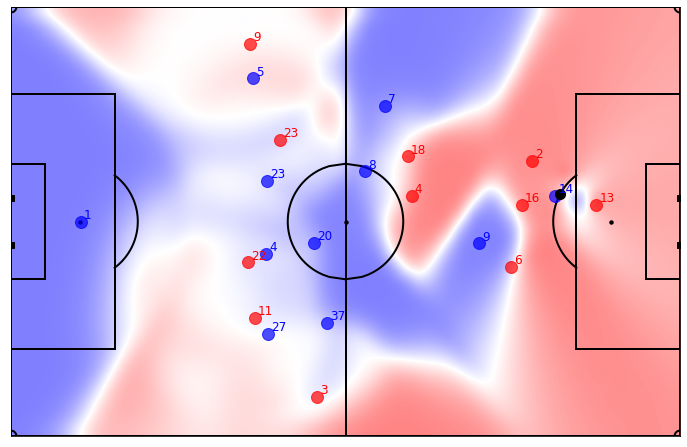

In [73]:
create_pitch_control_frame(frame_idx=46_255,
                           tracking_home=df_tracking_home_cry_lei,
                           tracking_away=df_tracking_away_cry_lei,
                           colour_home=colour_crystal_palace,
                           colour_away=colour_leicester_city,
                           filename='first_goal_cry_lei'
                          )

##### For a video

In [79]:
"""
create_pitch_control_video(starting_frame=46_055-200,
                           end_frame=46_055+200,
                           f=25,
                           tracking_home = df_tracking_home_cry_lei,
                           tracking_away = df_tracking_away_cry_lei,
                           colour_home=colour_crystal_palace,
                           colour_away=colour_leicester_city,
                           pitch_length=100.88880157470703,
                           pitch_width=67.97039794921875,
                           filename='first_goal_cry_lei'
                          )
"""

In [80]:
# Embed shot in the notebook
#Video('../../video/fig/second_spectrum/pitch_control_clip_first_goal_cry_lei_46255_46257.mp4', width=770, height=530, embed=True)

<a id='section4.5'></a>

### <a id='#section4.5'>4.5. Measuring the Physical Performance of Players</a>
Generating a bespoke physical summary of all the players for the the team of interest.

In [81]:
df_physical_summary_home_cry_bri = create_physical_report(df_tracking=df_tracking_home_cry_bri,
                                                          team='Home',    # 'Home' or 'Away'
                                                          match='Crystal Palace (1) vs. (1) Brighton & Hove Albion (27/09/2021)',
                                                          filename='crystal_palace_brighton_and_hove_albion'
                                                         )

In [82]:
df_physical_summary_home_cry_bri

,JerseyNo,Minutes Played,Distance [km],Walking [km],Jogging [km],Running [km],Sprinting [km],Team,Match
0,11,98.641333,10.493081,4.754986,3.051508,2.349182,0.337406,Home,Crystal Palace (1) vs. (1) Brighton & Hove Alb...
1,13,98.641333,5.887491,4.304660,1.372816,0.210015,0.000000,Home,Crystal Palace (1) vs. (1) Brighton & Hove Alb...
2,16,98.641333,10.410017,3.780589,4.355917,2.058722,0.214789,Home,Crystal Palace (1) vs. (1) Brighton & Hove Alb...
3,18,98.641333,12.645089,3.746834,5.722932,3.073963,0.101359,Home,Crystal Palace (1) vs. (1) Brighton & Hove Alb...
4,2,98.641333,10.339087,4.049635,4.137127,1.970023,0.182302,Home,Crystal Palace (1) vs. (1) Brighton & Hove Alb...
5,23,98.641333,11.886028,3.574501,4.894074,3.108461,0.308992,Home,Crystal Palace (1) vs. (1) Brighton & Hove Alb...
6,3,98.641333,10.666128,3.874920,4.037113,2.569133,0.184962,Home,Crystal Palace (1) vs. (1) Brighton & Hove Alb...
7,6,98.641333,10.020877,3.731754,4.526367,1.602890,0.159866,Home,Crystal Palace (1) vs. (1) Brighton & Hove Alb...
8,9,87.751333,10.521739,3.269296,4.183534,2.857333,0.211576,Home,Crystal Palace (1) vs. (1) Brighton & Hove Alb...
9,4,73.591333,9.457870,2.920623,4.076182,2.404404,0.056661,Home,Crystal Palace (1) vs. (1) Brighton & Hove Alb...


As can probably be expected, it's the midfielders and forwards that do more sprinting.

##### Sustained sprints: how many sustained sprints per match

<a id='section4.6'></a>

### <a id='#section4.6'>4.6. Valuing Player Actions through an Expected Possession Value (EPV) model</a>

##### Get the EPV surface

In [ ]:
#home_attack_direction = sio.find_playing_direction (df_tracking_home_cry_lei, 'Home')

# shooting right-to-left = -1, shooting left-to-right = 1
home_attack_direction = 1

##### Get the EPV surface
The `plot_EPV` function from the `mviz` library uses the `find_playing_direction` function, initialised in the Data Engineering section

In [ ]:
EPV = sepv.load_EPV_grid(os.path.join(data_dir, 'reference', 'epv', f'EPV_grid.csv'))

In [ ]:
EPV

In [ ]:
sviz.plot_EPV(EPV, field_dimen=[106.0, 68], attack_direction=home_attack_direction)

In [ ]:
"""
# Calculate value-added for assist and plot expected value surface

### Define DataFrames
df_events = df_tracking_home_cry_lei
df_tracking_home = df_tracking_home_cry_lei
df_tracking_away = df_tracking_away_cry_lei

## Define Event Number
event_number = 822 # away team first goal


## Calculate EEPV added and the EPV difference from the Pitch Control using the 'calculate_epv_added' function
EEPV_added, EPV_diff = sepv.calculate_epv_added(event_number, df_events, df_tracking_home, df_tracking_away, GK_numbers, EPV, params)


## Calculate the full Pitch Control surface at the moment the pass is made and multiple this by the EPV surface at that instance
PPCF, xgrid, ygrid = spc.generate_pitch_control_for_event(event_number, df_events, df_tracking_home, df_tracking_away, params, GK_numbers, field_dimen = (106.,68.,), n_grid_cells_x = 50, offsides=True)


## Create figures for Event

### Visualise EPV added
fig,ax = sviz.plot_EPV_for_event(event_number, df_events, df_tracking_home, df_tracking_away, PPCF, EPV, annotate=True, autoscale=True)
fig.suptitle('Pass EPV added: %1.3f' % EEPV_added, y=0.95 )

### Visualise Pitch Control
sviz.plot_pitchcontrol_for_event(event_number, df_events, df_tracking_home, df_tracking_away, PPCF, annotate=True)
"""

In [ ]:
# FINISH THIS

---

<a id='section5'></a>

## <a id='#section5'>5. Data Analysis</a>

<a id='section5.1'></a>

### <a id='#section5.1'>5.1. Crystal Palace (1) vs. (1) Brighton & Hove Albion (27/09/2021)</a>

##### Match Highlights

In [ ]:
# Crystal Palace 1-1 Brighton
YouTubeVideo('Blkcd_N66PA', width=800, height=470)

Olise & Schlupp both came off the bench to help Palace get a point from 2-0 down, to finish 2-2.

Goals:
*   Iheanacho - 31' mins (Leicester)
*   Vardy - 36' mins (Leicester)
*   Olise - 60' mins (Crystal Palace)
*   Schlupp - 71' mins (Crystal Palace)

##### Visualisation of Attacking Chances

Determine when the shots take place in the game using Event data:

In [90]:
df_cry_lei_events = pd.read_csv(os.path.join(data_dir_opta, 'engineered', 'F24', 'f24-8-2021-2210324-eventdetails.csv'), index_col=None).drop(['Unnamed: 0'], axis=1)

In [101]:
# Filter Events DataFrame using the custom 'events_shots_only' function
df_cry_lei_shots = events_shots_only(df_cry_lei_events)

In [103]:
df_cry_lei_shots.head(50)

,event_id,period_id,min,sec,x,y,event_name,Home Team,Away Team,FirstName,LastName,FullName,Position,JerseyNo,outcome,isShot,isGoal,xG,xT
12,10,1,1,4,92.2,45.4,isMiss,Crystal Palace,Leicester City,Jamie,Vardy,Jamie Vardy,Striker,9.0,1,1,0,0.214850,NaN
57,43,1,3,54,85.2,63.5,isSavedShot,Crystal Palace,Leicester City,Harvey,Barnes,Harvey Barnes,Midfielder,7.0,1,1,0,0.045589,NaN
182,135,1,12,4,92.4,64.2,isSavedShot,Crystal Palace,Leicester City,Wilfried,Zaha,Wilfried Zaha,Striker,11.0,1,1,0,0.033447,NaN
186,137,1,12,8,91.9,31.0,isSavedShot,Crystal Palace,Leicester City,Conor,Gallagher,Conor Gallagher,Midfielder,23.0,1,1,0,0.011875,NaN
248,144,1,14,52,73.1,48.9,isSavedShot,Crystal Palace,Leicester City,Youri,Tielemans,Youri Tielemans,Midfielder,8.0,1,1,0,0.102249,NaN
478,259,1,30,51,82.1,56.1,isGoal,Crystal Palace,Leicester City,Kelechi,Iheanacho,Kelechi Iheanacho,Striker,14.0,1,1,1,0.164459,NaN
494,271,1,32,42,76.4,47.2,isSavedShot,Crystal Palace,Leicester City,Ademola,Lookman,Ademola Lookman,Midfielder,37.0,1,1,0,0.135897,NaN
560,315,1,36,54,89.3,61.9,isGoal,Crystal Palace,Leicester City,Jamie,Vardy,Jamie Vardy,Striker,9.0,1,1,1,0.067185,NaN
576,424,1,38,49,80.2,67.5,isSavedShot,Crystal Palace,Leicester City,Conor,Gallagher,Conor Gallagher,Midfielder,23.0,1,1,0,0.016104,NaN
613,446,1,40,39,80.8,65.5,isSavedShot,Crystal Palace,Leicester City,Wilfried,Zaha,Wilfried Zaha,Striker,11.0,1,1,0,0.024744,NaN


##### First Goal (Iheanacho 31' minutes)
*    Timestamp = 31min
*    Frame = 46,255

In [106]:
# Estimate frame number from timestamp
estimate_frame_no(31, 51)

47775

In [111]:
create_tracking_data_video(df_tracking_home=df_tracking_home_cry_lei,
                           df_tracking_away=df_tracking_away_cry_lei,
                           frame_start=46_055,
                           video_length_frames=250,
                           filename='tracking_clip_first_goal_cry_lei'
                          )

Generating movie...done


In [112]:
# Embed shot in the notebook
Video('../../video/fig/second_spectrum/tracking_clip_first_goal_cry_lei_46055_46305.mp4', width=770, height=530, embed=True)

In [ ]:
# Define the numbers of the goalkeepers
GK_numbers = [13, 1]

In [ ]:
## Define variables used in 'generate_pitch_control' function
frame_idx = 46_055
starting_frame = frame_idx - 200
end_frame=46_055+200
f=25
tracking_home = df_tracking_home_cry_lei
tracking_away = df_tracking_away_cry_lei
colour_home=colour_crystal_palace
colour_away=colour_leicester_city
cmap = LinearSegmentedColormap.from_list('mycmap', [colour_away, 'white', colour_home])
pitch_length=100.88880157470703
pitch_width=67.97039794921875
filename='first_goal_cry_lei'

## Visualise player positions using generate_pitch_control_for_event function from spc library
def make_frame(t):
    t2 = int(math.ceil(t*f+0.0001)-1)
    PPCF, xgrid, ygrid = spc.generate_pitch_control_for_event(t2+starting_frame, tracking_home, tracking_home, tracking_away, params, GK_numbers, field_dimen = (pitch_length, pitch_width), n_grid_cells_x=50)
    fig, ax = sviz.plot_pitchcontrol_for_event(t2+starting_frame, tracking_home, tracking_home, tracking_away, PPCF, cmap, include_player_velocities=False, annotate=True)
    image = mplfig_to_npimage(fig)
    return image    # returns a 8-bit RGB array

## Create MP4 video of tracking data
if not os.path.exists(video_dir_second_spectrum + f'/pitch_control_clip_{filename}_{starting_frame}_{end_frame}.mp4'):
    clip = mpy.VideoClip(make_frame, duration=((end_frame-starting_frame)/f)).set_fps(f)
    clip.write_videofile(video_dir_second_spectrum + f'/pitch_control_clip_{filename}_{starting_frame}_{end_frame}.mp4')

else:
    pass

t:   0%|          | 0/400 [00:00<?, ?it/s, now=None]

Moviepy - Building video ../../video/fig/second_spectrum/pitch_control_clip_first_goal_cry_lei_45855_46255.mp4.
Moviepy - Writing video ../../video/fig/second_spectrum/pitch_control_clip_first_goal_cry_lei_45855_46255.mp4




t:  14%|█▍        | 58/400 [03:07<19:37,  3.44s/it, now=None]

##### Second Goal (Jamie Vardy 36' minutes)
*    Timestamp = 36min
*    Frame = 46,255

##### Physical Performance

In [ ]:
df_physical_summary_home_cry_bri = create_physical_report(df_tracking=df_tracking_home_cry_bri,
                                                          team='Home',    # 'Home' or 'Away'
                                                          match='Crystal Palace (1) vs. (1) Brighton & Hove Albion (27/09/2021)',
                                                          filename='crystal_palace_brighton_and_hove_albion'
                                                         )

In [ ]:
df_physical_summary_home_cry_bri

<a id='section5.1'></a>

### <a id='#section5.1'>5.1. Shot 1</a>

<a id='section5.2'></a>

### <a id='#section5.2'>5.2. Crystal Palace (2) vs. (2) Leicester City (03/10/2021)</a>

##### Match Highlights

In [ ]:
# Crystal Palace 2-2 Leicester
YouTubeVideo('SFcyhpx0tww', width=800, height=470)

##### Visualisation of Attacking Chances

In [92]:
df_cry_bri_events = pd.read_csv(os.path.join(data_dir_opta, 'engineered', 'F24', 'f24-8-2021-2210334-eventdetails.csv'), index_col=None).drop(['Unnamed: 0'], axis=1)

In [104]:
# Filter Events DataFrame using the custom 'events_shots_only' function
df_cry_bri_shots = events_shots_only(df_cry_bri_events)

In [105]:
df_cry_bri_shots.head(50)

,event_id,period_id,min,sec,x,y,event_name,Home Team,Away Team,FirstName,LastName,FullName,Position,JerseyNo,outcome,isShot,isGoal,xG,xT
115,82,1,6,13,78.4,30.7,isSavedShot,Crystal Palace,Brighton & Hove Albion,Jordan,Ayew,Jordan Ayew,Striker,9.0,1,1,0,5.209970e-08,NaN
126,94,1,7,19,88.0,74.1,isSavedShot,Crystal Palace,Brighton & Hove Albion,Conor,Gallagher,Conor Gallagher,Midfielder,23.0,1,1,0,2.203877e-11,NaN
302,191,1,16,18,76.8,52.2,isSavedShot,Crystal Palace,Brighton & Hove Albion,Luka,Milivojevic,Luka Milivojevic,Midfielder,4.0,1,1,0,1.347743e-01,NaN
358,226,1,18,59,80.8,52.4,isSavedShot,Crystal Palace,Brighton & Hove Albion,Odsonne,Édouard,Odsonne Édouard,Striker,22.0,1,1,0,1.589304e-01,NaN
442,293,1,24,50,74.4,23.7,isMiss,Crystal Palace,Brighton & Hove Albion,Luka,Milivojevic,Luka Milivojevic,Midfielder,4.0,1,1,0,2.248865e-09,NaN
503,284,1,28,34,93.5,34.7,isMiss,Crystal Palace,Brighton & Hove Albion,Leandro,Trossard,Leandro Trossard,Striker,11.0,1,1,0,5.305533e-11,NaN
553,331,1,31,59,90.7,58.5,isSavedShot,Crystal Palace,Brighton & Hove Albion,Danny,Welbeck,Danny Welbeck,Striker,18.0,1,1,0,1.306156e-06,NaN
594,372,1,34,48,85.7,74.7,isSavedShot,Crystal Palace,Brighton & Hove Albion,Wilfried,Zaha,Wilfried Zaha,Striker,11.0,1,1,0,6.077153e-11,NaN
622,374,1,37,25,82.1,40.3,isMiss,Crystal Palace,Brighton & Hove Albion,Adam,Lallana,Adam Lallana,Midfielder,14.0,1,1,0,4.906680e-05,NaN
764,500,1,46,15,88.5,50.0,isGoal,Crystal Palace,Brighton & Hove Albion,Wilfried,Zaha,Wilfried Zaha,Striker,11.0,1,1,1,9.359677e-01,NaN


##### Physical Performance

In [ ]:
df_physical_summary_home_cry_lei = create_physical_report(df_tracking=df_tracking_home_cry_lei,
                                                          team='Home',    # 'Home' or 'Away'
                                                          match='Crystal Palace (2) vs. (2) Leicester City (03/10/2021)',
                                                          filename='crystal_palace_leicester_city'
                                                         )

In [ ]:
df_physical_summary_home_cry_lei

In [ ]:
df_physical_summary_away_cry_lei = create_physical_report(df_tracking=df_tracking_away_cry_lei,
                                                          team='Away',    # 'Home' or 'Away'
                                                          match='Crystal Palace (2) vs. (2) Leicester City (03/10/2021)',
                                                          filename='crystal_palace_leicester_city'
                                                         )

---

<a id='section6'></a>

## <a id='#section6'>6. Summary</a>
This notebook analyses and visualises [Second Spectrum](https://www.secondspectrum.com/index.html) Tracking data using [pandas](http://pandas.pydata.org/) for data engineering and [matplotlib](https://matplotlib.org/) for data visualisation.

---

<a id='section7'></a>

## <a id='#section7'>7. Next Steps</a>
The next stage is to..

---

<a id='section8'></a>

## <a id='#section8'>8. References</a>
*    [Second Spectrum](https://www.secondspectrum.com/index.html) data
*    [Laurie Shaw](https://twitter.com/EightyFivePoint)'s Metrica Sports Tracking data series for #FoT - [Introduction](https://www.youtube.com/watch?v=8TrleFklEsE), [Measuring Physical Performance](https://www.youtube.com/watch?v=VX3T-4lB2o0), [Pitch Control modelling](https://www.youtube.com/watch?v=5X1cSehLg6s), and [Valuing Actions](https://www.youtube.com/watch?v=KXSLKwADXKI). See the following for code [[link](https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking)]
*    Laurie Shaw's Metrica Sports Tracking data series for [Friends of Tracking](https://www.youtube.com/channel/UCUBFJYcag8j2rm_9HkrrA7w) (see the following for code [[link](https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking)]):
     +    [Introduction](https://www.youtube.com/watch?v=8TrleFklEsE);
     +    [Measuring Physical Performance](https://www.youtube.com/watch?v=VX3T-4lB2o0);
     +    [Pitch Control modelling](https://www.youtube.com/watch?v=5X1cSehLg6s); and
     +    [Valuing Actions](https://www.youtube.com/watch?v=KXSLKwADXKI).
*    [Demystifying Tracking data Sportlogiq webinar](https://www.youtube.com/watch?v=miEWHSTYvX4) by Sam Gregory and Devin Pleuler
*    [Will Spearman's masterclass in Pitch Control](https://www.youtube.com/watch?v=X9PrwPyolyU&list=PL38nJNjpNpH-l59NupDBW7oG7CmWBgp7Y) for Friends of Tracking
*    [How Tracking Data is Used in Football and What are the Future Challenges](https://www.youtube.com/watch?v=kHTq9cwdkGA) with Javier Fernández, Sudarshan 'Suds' Gopaladesikan, Laurie Shaw, Will Spearman and David Sumpter for Friends of Tracking.
*    [Introduction to tracking data in football](https://www.youtube.com/watch?v=fYqEnoOV9Po) by David Sumpter for Friends of Tracking

---

***Visit my website [eddwebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)